**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.
<br><br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)
_____________________________________________________________________


In [5]:
# 1. Загрузим из файлов и объединим датасеты (все кроме students.scv) в один общий
# - датасеты progresses и progress_phases объединим по идентификатору прогресса в общий датасет
# - к общему датасету добавим courses и course_contents со связью по идентификатору курса, номер модуля, номер урока  
import pandas as pd

df_courses = pd.read_csv("./Data/courses.csv", encoding="UTF-8")
df_course_contents = pd.read_csv("./Data/course_contents.csv", encoding="UTF-8")
df_progresses = pd.read_csv("./Data/progresses.csv", encoding="UTF-8")
df_progress_phases = pd.read_csv("./Data/progress_phases.csv", encoding="UTF-8")

result = pd.merge(df_progress_phases, df_progresses, how='left', left_on='progress_id', right_on='id')
result2 = pd.merge(result, df_courses, how='left', left_on=['course_id'], right_on=['id'])
main = pd.merge(result2, df_course_contents, how='left', 
                   left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
del main['id_y']
del main['id_x']
del main['Unnamed: 0']

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [3]:
# 1.1 посчитаю общее количество курсов в датасете
# у каждого курса есть "id" по нему и буду считать. 
# Для этого мне понадобиться колонка "course_id" из общего датасета

df = pd.DataFrame( main.groupby('course_id'))
number_of_courses = df.shape[0]
print(f"общее количество курсов в датасете = {number_of_courses}")

общее количество курсов в датасете = 15


In [4]:
# 1.2 количество модулей на каждом курсе
# Для этого мне понадобяться колонки 'title', 'module_title' из датасета

df = main.loc[:, ['title', 'module_title']]  
df1 = df.groupby(['title', 'module_title']).count()
df1['module_title_sum'] = 1
mts = df1.groupby('title').count()
for i in main.loc[:, ['title', 'module_title']].groupby('title').groups:
    print(f"На курсе {i} количество модулей = {mts.loc[i, 'module_title_sum']}")

На курсе Excel Базовый количество модулей = 9
На курсе Java-разработчик количество модулей = 17
На курсе Java-разработчик c нуля количество модулей = 9
На курсе JavaScript с нуля количество модулей = 18
На курсе PHP-разработчик с 0 до PRO. Часть 1 количество модулей = 8
На курсе SMM-маркетолог от А до Я количество модулей = 11
На курсе UX-дизайн количество модулей = 20
На курсе Анимация интерфейсов количество модулей = 21
На курсе Веб-вёрстка для начинающих 2.0 количество модулей = 8
На курсе Веб-дизайн PRO 2.0 количество модулей = 17
На курсе Веб-дизайн Базовый количество модулей = 17
На курсе Веб-дизайн с нуля 2.0 количество модулей = 19
На курсе Веб-разработчик количество модулей = 20
На курсе Интернет-маркетолог от Ingate количество модулей = 18
На курсе Руководитель digital-проектов количество модулей = 17


In [5]:
# либо же в виде таблицы - количество модулей на каждом курсе
mts

,module_title_sum
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


In [6]:
# 1.3 количество уроков в каждом модуле на каждом курсе

df = main.loc[:, ['title', 'module_title', 'lesson_title']]
df1 = df.groupby(['title', 'module_title', 'lesson_title']).count()
df1['lesson_title_sum'] = 1
mts = df1.groupby(['title', 'module_title']).count()
# выведем таблицу показывающую количество уроков в каждом модуле на каждом курсе
mts

lesson_title_sum
title                         module_title                                                        
Excel Базовый                  Визуализация данных Excel                                         5
                              Основной функционал Excel                                         11
                              Основной функционал Excel (продолжение)                            7
                              Сводные таблицы Excel                                              5
                              Формулы и функции Excel. Более сложные формулы                     5
...                                                                                            ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                  5
                              Требовательность digital-продюсера                                 4
                              Управление временем                                                4
                              Управление дизайнерами. Разработка дизайна по s...                 7
                              Экологичный путь менеджера                                         4

[229 rows x 1 columns]

In [7]:
# 1.4 медианное количество уроков в модуле на каждом курсе

mts.groupby(['title']).agg('median')

,lesson_title_sum
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,10.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


In [8]:
# 1.5 количество учеников на каждом курсе
# у каждого студента есть идентификатор, а потому нам нужна колонка "student_id"

# создадим датафрейм с колонками 'title' и 'student_id' из основного датасета
df_student_id = main.loc[:, ['title', 'student_id']] 

# сгруппируем колонки в полученном датафрейме
df_si = df_student_id.groupby(['title', 'student_id']).count()

# добавим новую колонку для числового подсчета студентов
df_si['student_id_sum'] = 1

# Найдем количество студентов по курсам
df_number_students_course = df_si.groupby('title').count()

# выводим таблицу с результатом
df_number_students_course

,student_id_sum
title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


In [13]:
from datetime import datetime
import pandas as pd

# получим данные по студентам
df_students = pd.read_csv("./Data/students.csv", encoding="UTF-8")

# создам новый датафрейм с идентификаторами студентов и их датами рождения
ds = df_students.loc[:, ['id', 'birthday']]

# студенты без возраста нам не нужны, удалим их
ds = ds.dropna()

# вычислим возраст студентов по их дате рождения и добавим в новую колонку 'age'
f = lambda x: int(datetime.today().year) - int(str(x[:x.find('-')]))
ds['age'] = ds.loc[:, 'birthday'].apply(f)

# ДОРАБОТКА по замечанию
# так же удалю, студентов указавших не верные данные по возрасту, а именно не вошедшие в возраст, больше 18 
# и меньше 90, думаю это правильно.
ds = ds[(ds['age'] >= 18) & (ds['age'] <= 90)]

# выведим возраст в порядке возрастания
ds.sort_values('age')

,id,birthday,age
20212,16468253cbf3f591524577530e38e885,2002-10-04,18
24298,c6954b3a031fba88dcfcb14dee637141,2002-09-26,18
18754,45b1fb4c788db946a0c9861ead26a65b,2002-02-21,18
12031,37d58ddcbf57b718994a416aaf37bd95,2002-09-29,18
20329,9ad9d07a855c49427d7c911fee3fd74d,2002-05-07,18
...,...,...,...
38352,c0dc087e0701bfb688e8d1f28bad024d,1935-03-08,85
36150,e927618e1f5be8179bddda81aaabfe42,1931-01-01,89
3575,9389179a11a2d7dd62064d0beb1df8e8,1930-04-01,90
10816,d436744d921b382db0050ef873c3da24,1930-01-12,90


In [14]:
# 1.6 минимальный, максимальный, средний, медианный возраст студентов
print(f"минимальный возраст студентов = {ds['age'].min()}")
print(f"максимальный возраст студентов = {ds['age'].max()}") 
print(f"средний возраст студентов = {ds['age'].mean()}")  
print(f"медианный возраст студентов = {ds['age'].median()}")  

минимальный возраст студентов = 18
максимальный возраст студентов = 90
средний возраст студентов = 30.05131318036502
медианный возраст студентов = 29.0


In [15]:
# 1.7 минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
# переменную - df_student_id мы получали ранее

# получу таблицу с колонками id и age
df_id_age = ds.loc[:, ['id', 'age']]

# соединим таблицы df_student_id и df_id_age, по колонкам student_id и id
df = pd.merge(df_student_id, df_id_age, left_on=['student_id'], right_on=['id'])

In [16]:
# выведим возраста по курсам
df.groupby('title').agg(['min', 'max', 'mean', 'median'])

age                      
                                    min max       mean median
title                                                        
Excel Базовый                        18  61  33.691598     34
Java-разработчик                     18  65  30.464808     29
Java-разработчик c нуля              18  55  30.861952     30
JavaScript с нуля                    18  60  29.198380     28
PHP-разработчик с 0 до PRO. Часть 1  18  75  31.610096     30
SMM-маркетолог от А до Я             18  52  29.326734     29
UX-дизайн                            18  85  30.867521     30
Анимация интерфейсов                 18  51  30.422707     30
Веб-вёрстка для начинающих 2.0       18  60  29.333649     28
Веб-дизайн PRO 2.0                   18  59  29.142191     28
Веб-дизайн Базовый                   18  51  29.155472     28
Веб-дизайн с нуля 2.0                18  76  28.725518     28
Веб-разработчик                      18  51  28.231156     27
Интернет-маркетолог от Ingate        18  60  31.831337     31
Руководитель digital-проектов        19  55  32.349246     32

2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

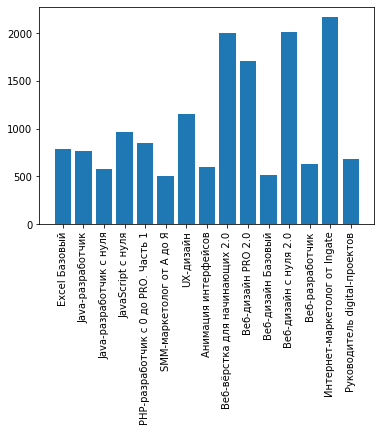

In [13]:
# 2. Постройте bar-chart, отражающий количество студентов на каждом курсе. 
# Ticks нужно развернуть так, чтобы они были читаемы

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

register_matplotlib_converters()
fig, subplot = plt.subplots()

# получаем данные по графику
air_df = df_number_students_course.loc[:, 'student_id_sum']
x_axis = df_number_students_course.index.values

subplot.bar(x = x_axis, height = air_df.values)

# подписи для оси Ох
x_labels = [str(i) for i in air_df.index.values]

# добавляем подписи к осям
plt.xticks(air_df.index.values, rotation='vertical', labels=x_labels)

plt.show()

3. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

**Вывод** Смотря на полученные данные можно сказать что самыми популярными курсами являются "Веб-дизайн с нуля 2.0", "Интернет-маркетолог от Ingate", "Веб-вёрстка для начинающих 2.0", возраст учеников в среднем порядка 29 лет.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [1]:
# Подготовка данных
import pandas as pd

df_courses = pd.read_csv("./Data/courses.csv", encoding="UTF-8")
df_course_contents = pd.read_csv("./Data/course_contents.csv", encoding="UTF-8")
df_progresses = pd.read_csv("./Data/progresses.csv", encoding="UTF-8")
df_progress_phases = pd.read_csv("./Data/progress_phases.csv", encoding="UTF-8")

result = pd.merge(df_progress_phases, df_progresses, how='left', left_on='progress_id', right_on='id')
result2 = pd.merge(result, df_courses, how='left', left_on=['course_id'], right_on=['id'])
main = pd.merge(result2, df_course_contents, how='left', 
                   left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
del main['id_y']
del main['id_x']
del main['Unnamed: 0']
main.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [3]:
from datetime import datetime
f = lambda x: datetime.strptime(str(x[:x.find(' ')]),"%Y-%m-%d").strftime("%Y%m")

In [4]:
### YOUR CODE HERE ### ДОРАБОТАННО
# Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю 
# (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). 
# Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

# выберем нужные столбцы
df = main.loc[:, ['title', 'student_id', 'start_date', 'is_homework']]

# так как считать дату начала прохождения курса студентом по дате начала первой домашней работы , то
# выбираю данные с домашней работой
df = df[df['is_homework'] == True]

# Добавлю новую колонку с годом и месяцем из start_date
# f = lambda x: datetime.strptime(str(x[:x.find(' ')]),"%Y-%m-%d").strftime("%Y%m")
df['year_month'] = df.loc[:, 'start_date'].apply(f)

# найду месяца с началом первых домашних работ
df_group_students = df.loc[:, ['title', 'year_month', 'student_id']].groupby(
    ['title', 'student_id']).agg(
    {'year_month':'min'}).sort_values(['title','year_month']).reset_index()

# найду количество студентов по месяцам
df_count_students = df_group_students.groupby(['title', 'year_month']).agg('count').reset_index()

# переименую колонку
df_count_students.rename(columns={'student_id': 'student_count'}, inplace=True)

# найду месяца по курсам
df_background = df.loc[:, ['title', 'year_month', 'student_id']].groupby(
    ['title','year_month']).agg('count').sort_values(['title',
                                            'year_month']).reset_index()

# свяжу две таблицы, заполню пустые значения  
df_gr = pd.merge(df_background.loc[:, ['title', 'year_month']], df_count_students, how='outer', 
                   left_on=['title', 'year_month'],
                   right_on=['title', 'year_month']).fillna(0)

# изменю тип колонки на тип int
df_gr['student_count'] = df_gr['student_count'].astype('int')
df_gr

,title,year_month,student_count
0,Excel Базовый,201802,6
1,Excel Базовый,201803,3
2,Excel Базовый,201804,0
3,Excel Базовый,201805,3
4,Excel Базовый,201806,9
5,Excel Базовый,201807,13
6,Excel Базовый,201808,15
7,Excel Базовый,201809,40
8,Excel Базовый,201810,30
9,Excel Базовый,201811,33


2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

# получаем данные по графику
df_gr.index = df_gr.title
df_title = df_courses.groupby(['title']).count().reset_index()

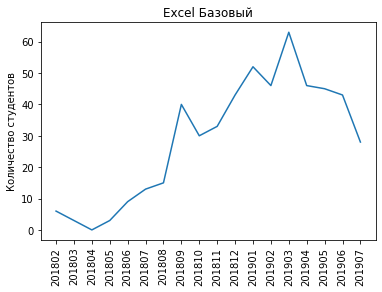

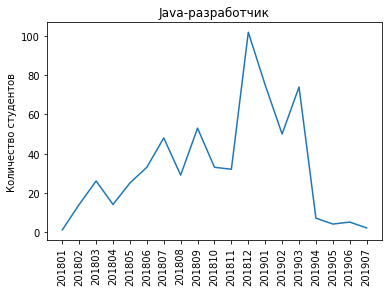

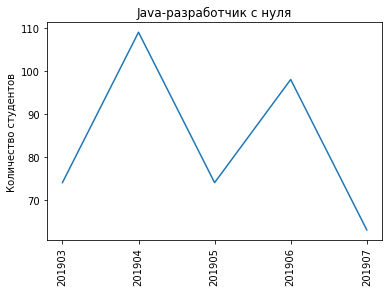

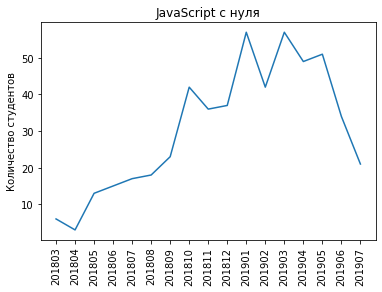

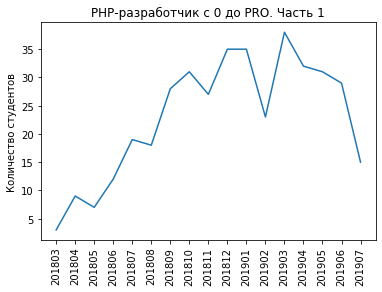

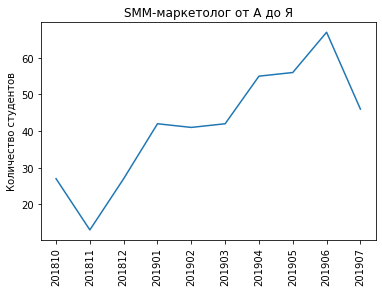

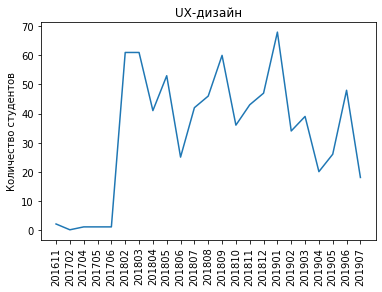

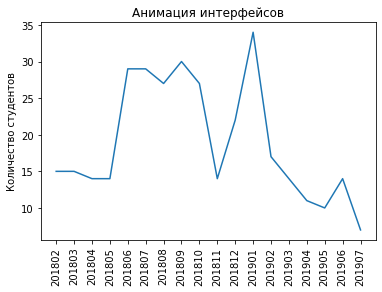

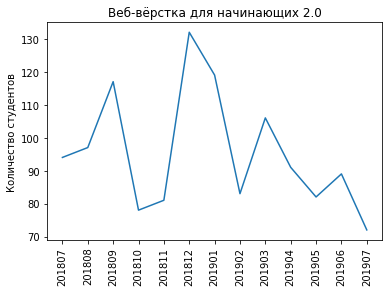

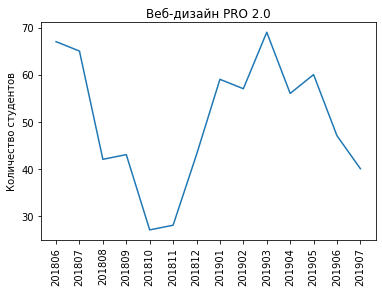

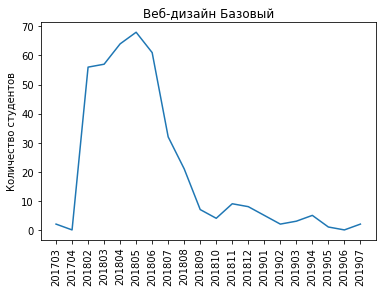

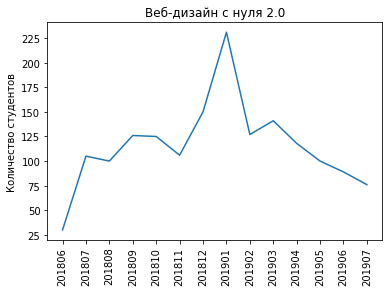

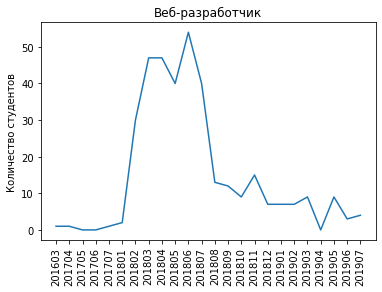

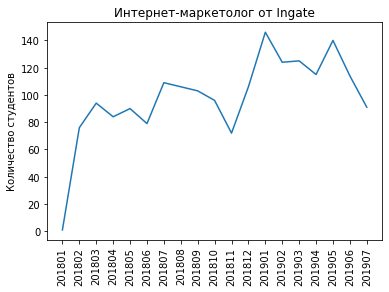

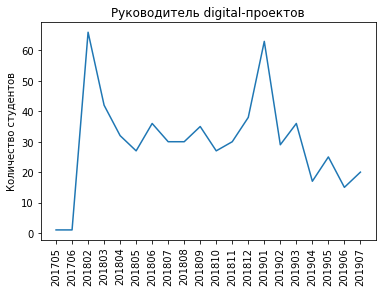

In [6]:
# выведу графики
for i in df_title.loc[:, 'title'].values:
    
    register_matplotlib_converters()
    fig, subplot = plt.subplots()
    
    x = list(j[0] for j in df_gr.loc[i, 'year_month': 'student_count'].values)
    y = list(j[1] for j in df_gr.loc[i, 'year_month': 'student_count'].values)
    
    # график функции
    subplot.plot(x, y)

    # подписываем график
    subplot.set_title(str(i))
    
    # станавливаем название для оси  OX
    subplot.set_ylabel('Количество студентов')

    # подписи для оси Ох
    x_labels = [str(i) for i in x]

    # добавляем подписи к осям
    plt.xticks(x, rotation='vertical', labels=x_labels)

    plt.show()    

4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [2]:
# функция пригодится позже
from datetime import datetime, MAXYEAR

def transformation(x):
    try:
        if x != None:
            x = datetime.strptime(str(x[:x.find(' ')]),"%Y-%m-%d").strftime("%Y-%m") 
        else:
            x = '2019-07'
        
    except AttributeError:
        x = '2019-07'
    return x

In [3]:
# выберем нужные столбцы
df = main.loc[:, ['status', 'title', 'start_date', 'finish_date', 'progress_id', 'is_homework']].sort_values('start_date', axis = 0)

# выбираю данные с домашней работой
df = df[df['is_homework'] == True]

df['start_date_month'] = df.loc[:, 'start_date'].apply(transformation)
df['finish_date_month'] = df.loc[:, 'finish_date'].apply(transformation)

# уберу не нужные колонки
del df['start_date']
del df['finish_date']
del df['is_homework']

In [4]:
df

,status,title,progress_id,start_date_month,finish_date_month
215412,done,Веб-разработчик,fd66f592001bd159efcbd014cf5ed608,2016-03,2016-03
215416,done,Веб-разработчик,fd66f592001bd159efcbd014cf5ed608,2016-03,2016-03
215410,done,Веб-разработчик,fd66f592001bd159efcbd014cf5ed608,2016-03,2016-03
215414,done,Веб-разработчик,fd66f592001bd159efcbd014cf5ed608,2016-03,2016-03
215417,done,Веб-разработчик,fd66f592001bd159efcbd014cf5ed608,2016-03,2016-03
233622,done,UX-дизайн,ccc4d33cca2c0ce087dd54cabc7f2a1e,2016-11,2016-11
233588,done,UX-дизайн,ccc4d33cca2c0ce087dd54cabc7f2a1e,2016-11,2016-11
233589,done,UX-дизайн,ccc4d33cca2c0ce087dd54cabc7f2a1e,2016-11,2017-01
7098,done,UX-дизайн,09c8727d51a4e5883d718291d6f0341c,2016-11,2016-12
233612,done,UX-дизайн,ccc4d33cca2c0ce087dd54cabc7f2a1e,2017-02,2017-02


In [24]:
df_table = df.loc[:, ['progress_id', 'title', 'start_date_month', 'finish_date_month', 'status']]

In [25]:
df_gr = df_table.groupby('title').apply(lambda course: course.apply(
    lambda x: pd.Series(1, index=pd.date_range(
        x['start_date_month'], x['finish_date_month'], closed=None, freq='MS')), axis=1).sum(
    axis=0)).reset_index(level=0)

In [26]:
df_gr = df_gr.rename(columns={0 : 'count_progress'})

In [27]:
df_gr

,title,count_progress
2018-02-01,Excel Базовый,37.0
2018-03-01,Excel Базовый,9.0
2018-04-01,Excel Базовый,16.0
2018-05-01,Excel Базовый,21.0
2018-06-01,Excel Базовый,41.0
2018-07-01,Excel Базовый,85.0
2018-08-01,Excel Базовый,101.0
2018-09-01,Excel Базовый,201.0
2018-10-01,Excel Базовый,264.0
2018-11-01,Excel Базовый,272.0


5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны.
Ticks нужно развернуть так, чтобы они были читаемы

In [29]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

# получаем данные по графику
df_gr['year_month'] = df_gr.index
df_gr.index = df_gr.title
df_title = df_courses.groupby(['title']).count().reset_index()

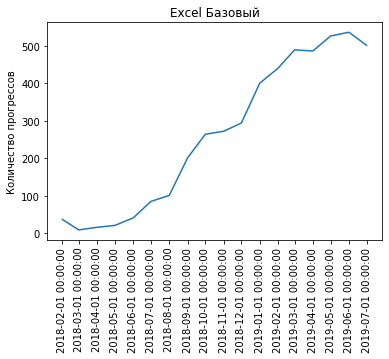

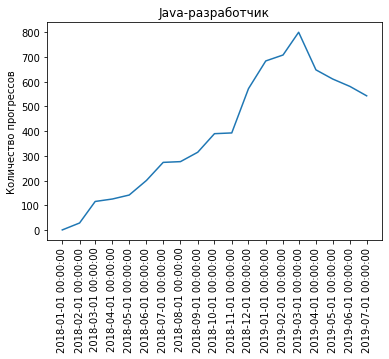

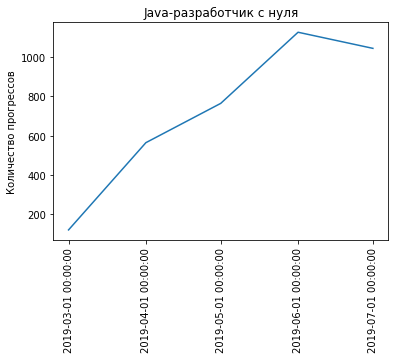

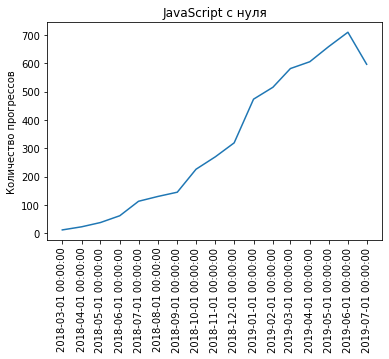

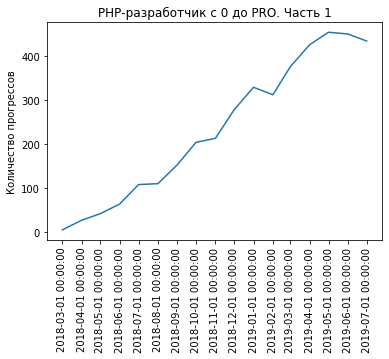

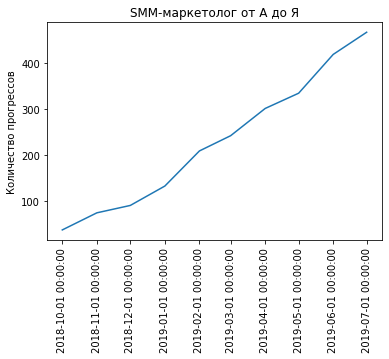

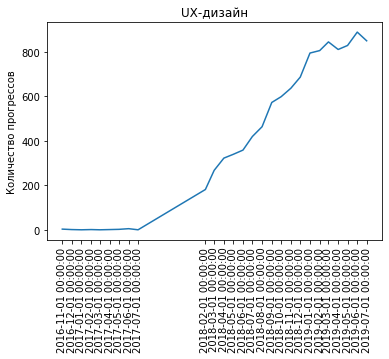

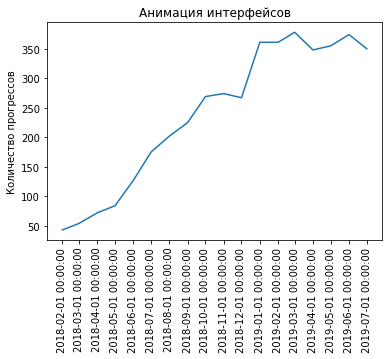

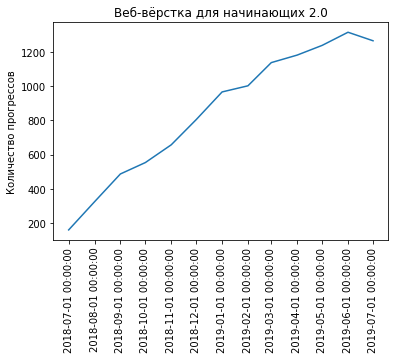

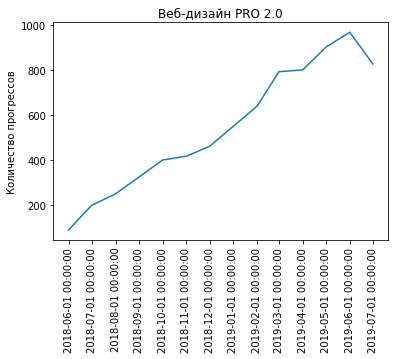

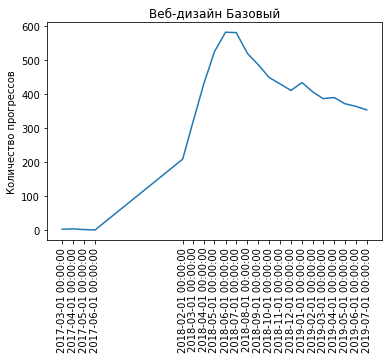

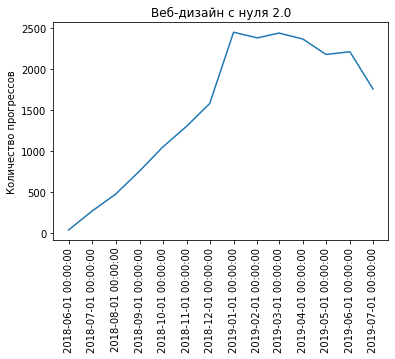

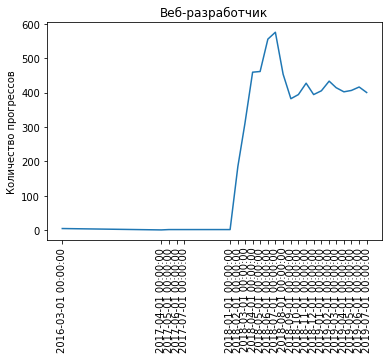

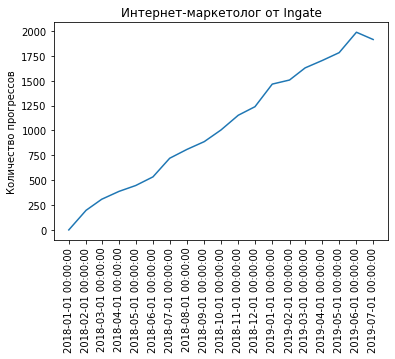

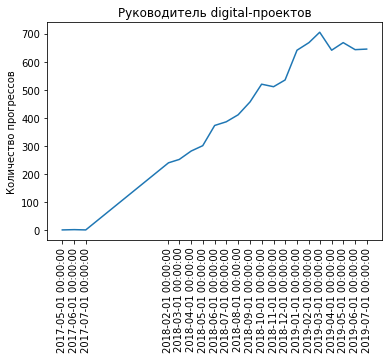

In [30]:
# выведу графики
for i in df_title.loc[:, 'title'].values:
    
    register_matplotlib_converters()
    fig, subplot = plt.subplots()
    
    x = list(j[0] for j in df_gr.loc[i, ['year_month', 'count_progress']].values)
    y = list(j[1] for j in df_gr.loc[i, ['year_month', 'count_progress']].values)
    
    # график функции
    subplot.plot(x, y)

    # подписываем график
    subplot.set_title(str(i))
    
    # станавливаем название для оси  OX
    subplot.set_ylabel('Количество прогрессов')

    # подписи для оси Ох
    x_labels = [str(i) for i in x]

    # добавляем подписи к осям
    plt.xticks(x, rotation='vertical', labels=x_labels)

    plt.show()   

6. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**Вывод** На основании рассчитанных значений, в полной мере и с уверенностью могу сказать что по притоку студентов практически на всех графиках наблюдается первоначальный рост и быстрый спад студентов после 2019 года (куда все убегаю, может я тоже туда пойду ?), так же и по загруженности учителей где в большинстве курсов наблюдается рост и последующий спад по нагрузке с начала 2019 года. 

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [85]:
# Подготовка данных
import pandas as pd
from datetime import datetime, MAXYEAR

df_courses = pd.read_csv("./Data/courses.csv", encoding="UTF-8")
df_course_contents = pd.read_csv("./Data/course_contents.csv", encoding="UTF-8")
df_progresses = pd.read_csv("./Data/progresses.csv", encoding="UTF-8")
df_progress_phases = pd.read_csv("./Data/progress_phases.csv", encoding="UTF-8")

result = pd.merge(df_progress_phases, df_progresses, how='left', left_on='progress_id', right_on='id')
result2 = pd.merge(result, df_courses, how='left', left_on=['course_id'], right_on=['id'])
main = pd.merge(result2, df_course_contents, how='left', 
                   left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
del main['id_y']
del main['id_x']
del main['Unnamed: 0']

In [86]:
# выберем нужные столбцы с домашней работой
df = main[main['is_homework'] == True].loc[:, ['title',
                                              'module_title', 
                                              'student_id', 
                                              'start_date', 
                                              'finish_date']
                                          ].sort_values('start_date', axis = 0)


df.head()

,title,module_title,student_id,start_date,finish_date
215412,Веб-разработчик,О программе,44dd0d965e963e22c561ace77c7d6d19,2016-03-15 17:39:14+00,2016-03-15 18:30:22+00
215416,Веб-разработчик,HTML. Общая структура HTML-документа,44dd0d965e963e22c561ace77c7d6d19,2016-03-16 16:52:18+00,2016-03-17 05:42:13+00
215410,Веб-разработчик,HTML. Формы,44dd0d965e963e22c561ace77c7d6d19,2016-03-17 10:10:13+00,2016-03-18 07:26:45+00
215414,Веб-разработчик,CSS. Знакомство со стилями,44dd0d965e963e22c561ace77c7d6d19,2016-03-18 17:56:32+00,2016-03-20 16:15:24+00
215417,Веб-разработчик,Позиционирование при помощи CSS,44dd0d965e963e22c561ace77c7d6d19,2016-03-24 05:25:49+00,2016-03-26 12:07:21+00


In [87]:
# преобразую к типу дата колонки 'start_date' и 'finish_date'
df['start_date'] = pd.to_datetime(df['start_date'])
df['finish_date'] = pd.to_datetime(df['finish_date'])
df.dtypes

title                        object
module_title                 object
student_id                   object
start_date      datetime64[ns, UTC]
finish_date     datetime64[ns, UTC]
dtype: object

In [88]:
df_finish_max = df.loc[:, ['title', 'module_title', 'student_id', 'finish_date']].groupby(
    ['title', 'module_title', 'student_id',]).max()

In [89]:
df_start_min = df.loc[:, ['title', 'module_title', 'student_id', 'start_date']].groupby(
    ['title', 'module_title', 'student_id',]).min()

In [90]:
Series_result = df_finish_max.finish_date - df_start_min.start_date

In [91]:
df_result = pd.DataFrame(Series_result, columns=['difference_date']).reset_index()

In [92]:
# оставлю только дни
df_result['difference_date'] = df_result.loc[:, 'difference_date'].apply(lambda x: 0 if x.days < 0 else x.days)

In [93]:
df_result[df_result['title'] == 'Excel Базовый'].loc[:, ['title', 'module_title', 'difference_date']].groupby(
    ['title', 'module_title']).max()

difference_date
title         module_title                                                       
Excel Базовый  Визуализация данных Excel                                    174.0
              Основной функционал Excel                                     183.0
              Основной функционал Excel (продолжение)                       184.0
              Сводные таблицы Excel                                         239.0
              Формулы и функции Excel. Более сложные формулы                175.0
              Формулы и функции Excel. Введение                              89.0
              Формулы и функции Excel. Продолжаем работать с ...            327.0
              Формулы и функции Excel. Работа с ошибками, про...             77.0
              Экзаменационная работа                                        156.0

In [94]:
# Найду 'min', 'max', 'mean', 'median' по времени каждого модуля для каждого курса
df_result.loc[:, ['title', 'module_title', 'difference_date']].groupby(
    ['title', 'module_title']).agg(['min', 'max', 'mean', 'median'])

difference_date  \
                                                                                             min   
title                         module_title                                                         
Excel Базовый                  Визуализация данных Excel                                     0.0   
                              Основной функционал Excel                                      0.0   
                              Основной функционал Excel (продолжение)                        0.0   
                              Сводные таблицы Excel                                          0.0   
                              Формулы и функции Excel. Более сложные формулы                 0.0   
                              Формулы и функции Excel. Введение                              0.0   
                              Формулы и функции Excel. Продолжаем работать с ...             0.0   
                              Формулы и функции Excel. Работа с ошибками, про...             0.0   
                              Экзаменационная работа                                         0.0   
Java-разработчик              Вводный модуль                                                 0.0   
                              Веб-приложения: формы, заголовки и сессии                      0.0   
                              Внешний вид GUI и рисование                                    0.0   
                              Итоговая тема                                                  0.0   
                              Массивы и коллекции                                            0.0   
                              Многопоточность                                                0.0   
                              Наследование и полиморфизм                                     0.0   
                              Объекты и классы                                               0.0   
                              Оптимизация кода и приложений                                  0.0   
                              Основы построения GUI                                          0.0   
                              Основы построения веб-приложений                               0.0   
                              Работа с базами данных                                         0.0   
                              Работа с файлами и сетью                                       0.0   
                              Синтаксис языка                                                0.0   
                              Тестирование и отладка                                         0.0   
                              Числа, строки и даты                                           0.0   
Java-разработчик c нуля       Вводный модуль                                                 0.0   
                              Исключения, отладка, тестирование и логгирование               1.0   
                              Массивы и коллекции                                            0.0   
                              Наследование и полиморфизм                                     0.0   
                              Объекты и классы                                               0.0   
...                                                                                          ...   
Интернет-маркетолог от Ingate Веб-аналитика: максимум информации об эффективн...             0.0   
                              Исследование целевой аудитории: портретирование...             0.0   
                              Контекстная реклама в Yandex Direct и Google Ad...             0.0   
                              Контент-маркетинг: стратегия коммуникации, кана...             0.0   
                              Маркетплейсы                                                   0.0   
                              Медиапланирование: разработка комплексной страт...             0.0   
                              Медийная реклама и RTB: охват или целевые польз... 

2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

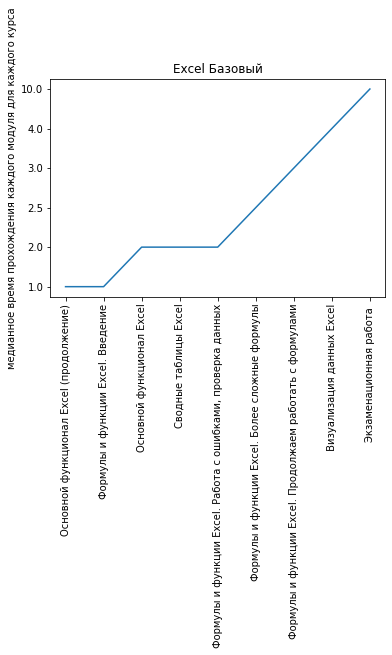

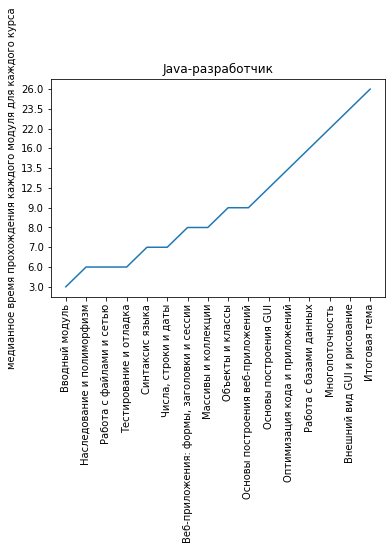

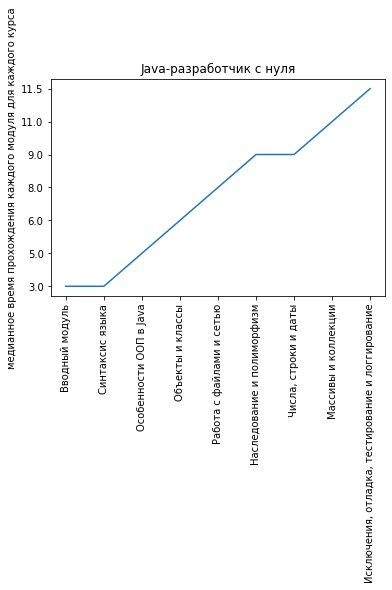

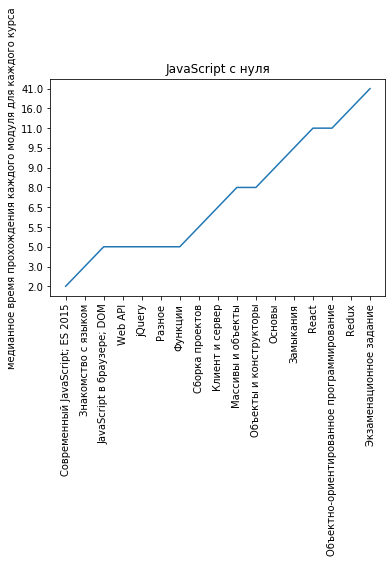

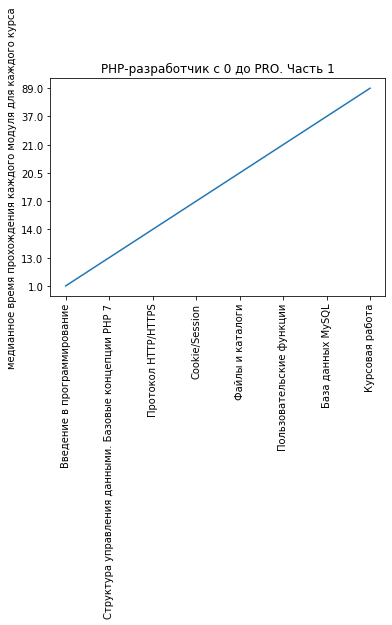

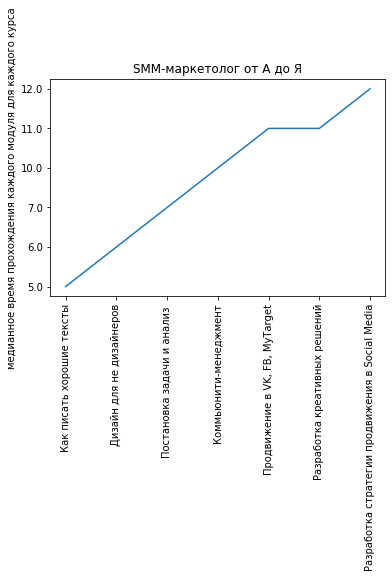

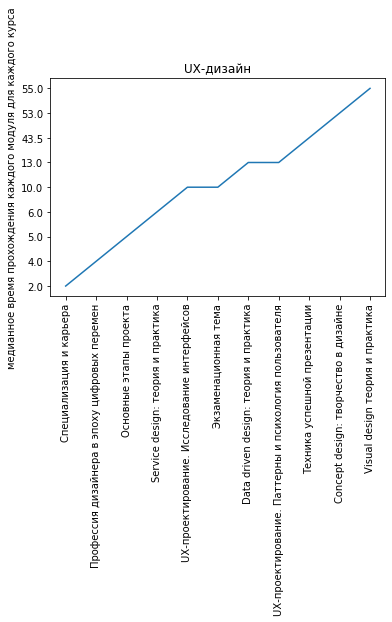

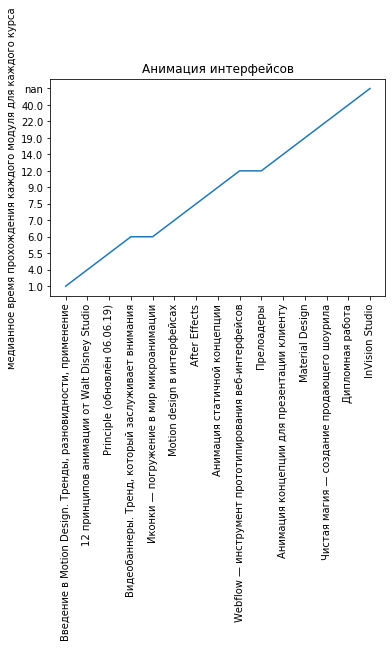

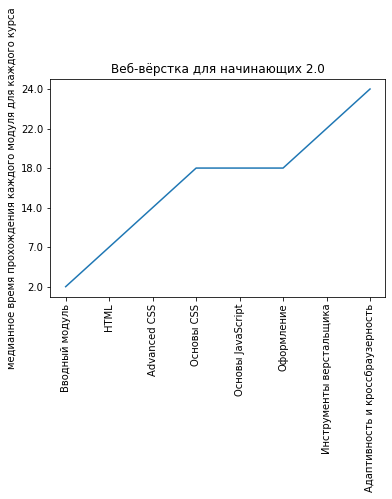

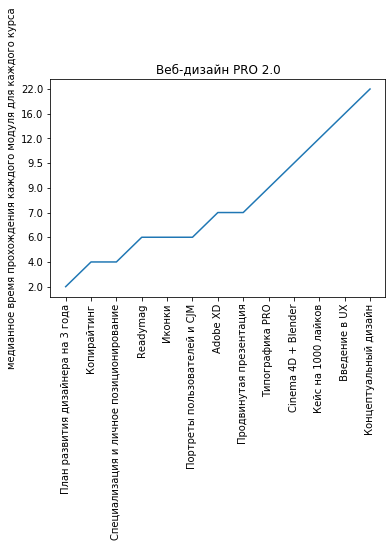

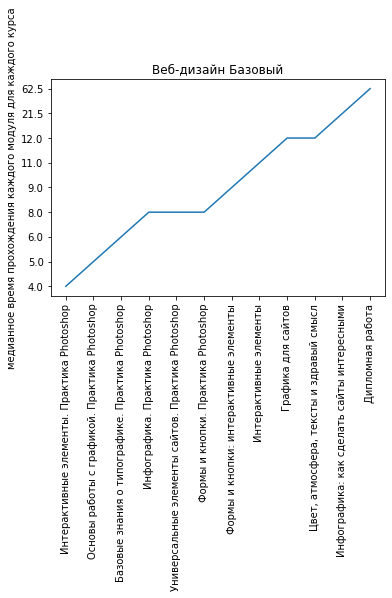

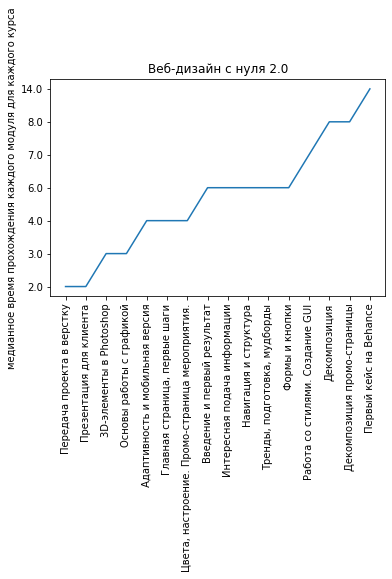

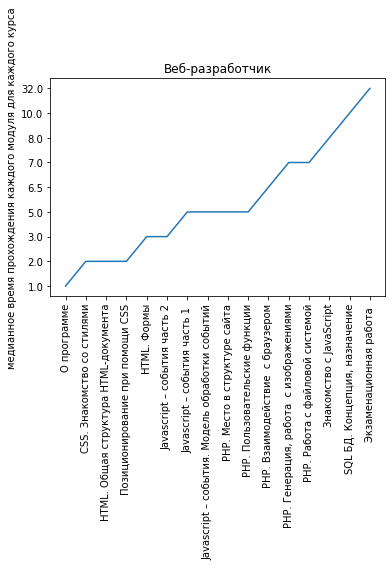

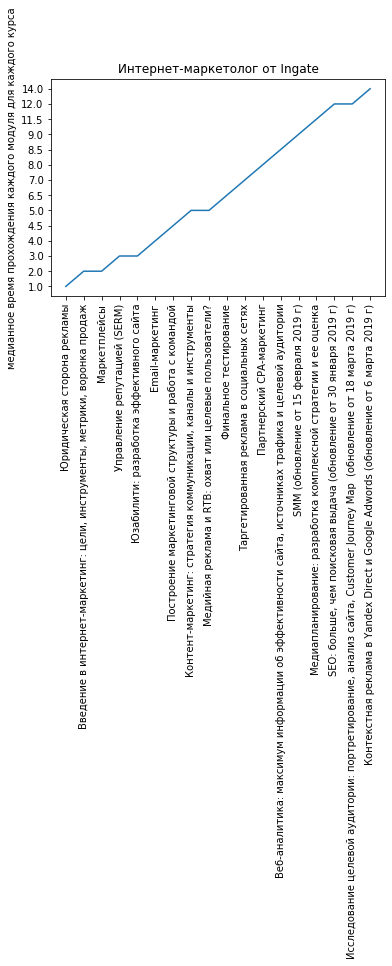

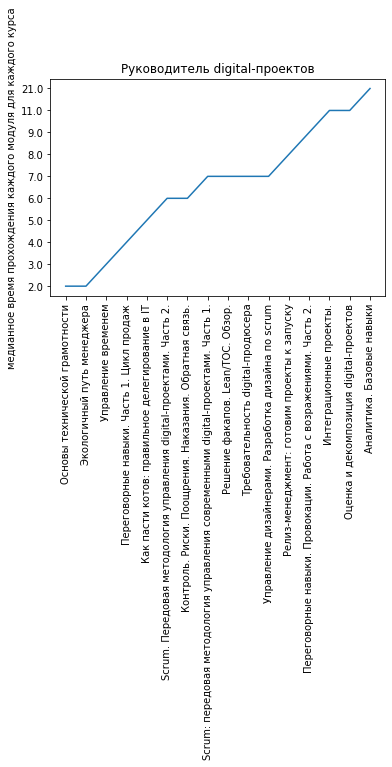

In [68]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

# Произведу подсчет курсов
df_gr = df_result.loc[:, ['title', 'module_title', 'difference_date']].groupby(
    ['title', 'module_title']).median().reset_index().sort_values(by = ['title','difference_date'])

# получаем данные по графику
df_course_id = df_gr.loc[:, ['title', 'difference_date']]
df_gr.index = df_gr.title

for i in df_course_id.groupby('title').count().reset_index().values:
    
    register_matplotlib_converters()
    fig, subplot = plt.subplots()
    
    x = list(str(j) for j in df_gr.loc[i[0], 'module_title'].values)
    y = list(str(j) for j in df_gr.loc[i[0], 'difference_date'].values)

    # график функции
    subplot.plot(x, y)

    # подписываем график
    subplot.set_title(str(i[0]))
    
    # устанавливаем название для оси  OX
    subplot.set_ylabel('медианное время прохождения каждого модуля для каждого курса')

    # подписи для оси Ох
    x_labels = [str(i) for i in x]

    # добавляем подписи к осям
    plt.xticks(x, rotation='vertical', labels=x_labels)

    plt.show()

3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 

In [19]:
# получу месяцы из колонки "start_date" и посчитаю медианное время выполнения домашней работы по 
# месяцам (12 месяцев, январь-декабрь) для каждого курса.
df_median = df.loc[:, ['title', 'start_date', 'finish_date']]

In [20]:
df_median['month'] = df_median.loc[:, 'start_date'].apply(lambda x: x.month)

In [21]:
df_median['difference_date'] = df_median.loc[:, 'finish_date'] - df_median.loc[:, 'start_date']

In [22]:
# для удобного расчета переведу колонку 'difference_date' в секунды
df_median['difference_date'] = df_median.loc[:, 'difference_date'].apply(days_seconds)

In [23]:
df_mg = df_median.loc[:, ['title', 'month', 'difference_date']].groupby(['title', 'month']).agg('median')

In [38]:
df_mg.sort_values(by = ['title', 'difference_date'], ascending=False)

difference_date
title                         month                 
Руководитель digital-проектов 2              67616.5
                              10             61978.0
                              8              61515.0
                              9              61065.0
                              12             60849.0
                              6              59688.0
                              7              57441.0
                              1              56479.0
                              5              55747.0
                              3              55514.5
                              11             55197.5
                              4              52929.0
Интернет-маркетолог от Ingate 7              58120.0
                              2              53943.5
                              12             51769.5
                              11             51196.5
                              6              50831.0
                              3              49894.5
                              5              49308.0
                              4              49190.0
                              8              49028.0
                              9              48297.0
                              1              44111.0
                              10             35214.0
Веб-разработчик               2              72690.0
                              12             68430.0
                              3              63771.0
                              11             54975.0
                              1              50447.0
                              4              45533.0
...                                              ...
JavaScript с нуля             4              38988.0
Java-разработчик c нуля       3              51971.0
                              4              49155.0
                              5              48084.0
                              7              44455.0
                              6              44418.0
Java-разработчик              10             63037.0
                              12             51242.0
                              1              50367.0
                              5              48445.0
                              11             47341.5
                              2              46678.0
                              9              45174.0
                              4              42330.0
                              3              41136.0
                              7              38752.0
                              8              28856.0
                              6              28297.0
Excel Базовый                 6              54610.0
                              8              54416.0
                              2              53696.0
                              5              53234.5
                              4              52799.5
                              7              52644.0
                              12             51348.0
                              9              49096.0
                              1              46235.0
                              10             45726.0
                              3              44309.0
                              11             40480.0

[171 rows x 1 columns]

4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐

In [24]:
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


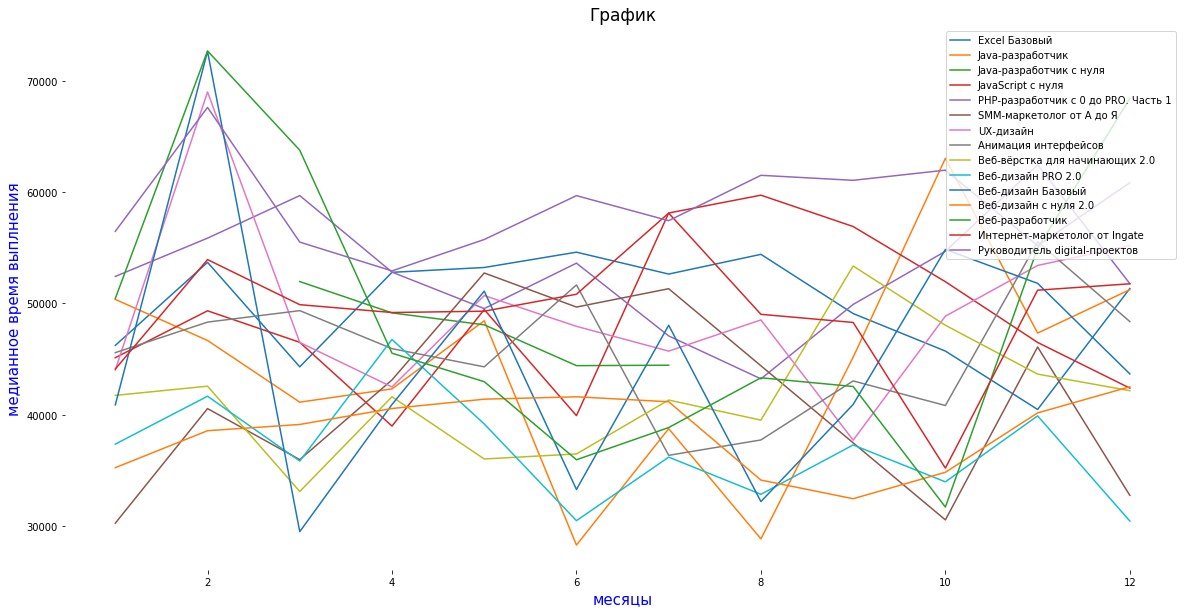

In [27]:
df_graf = df_mg.reset_index()
df_course = df_graf.loc[:, 'title'].reset_index().groupby('title').count().index
df_graf.index = df_graf.title

for i in df_course:
    plt.plot(df_graf.loc[i, 'month'].values, df_graf.loc[i, 'difference_date'].values, label = i)

plt.xlabel('месяцы', fontsize=15, color='blue')
plt.ylabel('медианное время выплнения', fontsize=15, color='blue')
plt.title('График', fontsize=17)
plt.legend(loc=1)
plt.rcParams["figure.figsize"] = (20, 10)

subplot = plt.subplot()
# удалю рамку
subplot.set_frame_on(False)

plt.show()

5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**Вывод** На основании полученных данных можно сказать что разные модули в курсах имеют разное время прохождения, какие то больше какие то меньше, но это и логично, в каждом курсе данные по знаниям разные где то больше где то меньше. По поводу сезонности тоже явного признака нет, так что твердо утверждать что у такого то курса в таких то месяцах будет обязательный прирост я бы не спешил.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [1]:
# Подготовка данных
import pandas as pd

df_courses = pd.read_csv("./Data/courses.csv", encoding="UTF-8")
df_course_contents = pd.read_csv("./Data/course_contents.csv", encoding="UTF-8")
df_progresses = pd.read_csv("./Data/progresses.csv", encoding="UTF-8")
df_progress_phases = pd.read_csv("./Data/progress_phases.csv", encoding="UTF-8")

result = pd.merge(df_progress_phases, df_progresses, how='left', left_on='progress_id', right_on='id')
result2 = pd.merge(result, df_courses, how='left', left_on=['course_id'], right_on=['id'])
main = pd.merge(result2, df_course_contents, how='left', 
                   left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
del main['id_y']
del main['id_x']
del main['Unnamed: 0']
main.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [2]:
# Выберем нужные колонки для работы
df = main.loc[:, ['title', 'module_title', 'module_number', 'is_homework', 'student_id', 'start_date', 'finish_date']]

# возьмем только домашние работы
df = df[df['is_homework'] == True]

In [3]:
# преобразую к типу дата колонки 'start_date' и 'finish_date'
df['start_date'] = pd.to_datetime(df['start_date'])
df['finish_date'] = pd.to_datetime(df['finish_date'])

In [4]:
# найду количества студентов, приступивших к выполнению домашнего задания в модуле
df_start = df.loc[:, ['title', 'module_number', 'start_date', 'student_id']]
Series_start_homework = df_start.groupby(['title', 'module_number', 'student_id'])['start_date'].agg('min')
df_start_homework = Series_start_homework.groupby(['title', 'module_number']).count()

In [5]:
df_sh = df_start_homework.reset_index()
df_sh.rename(columns={'start_date': 'start_count_students'}, inplace=True)
df_sh

,title,module_number,start_count_students
0,Excel Базовый,1,518
1,Excel Базовый,2,434
2,Excel Базовый,3,398
3,Excel Базовый,4,345
4,Excel Базовый,5,298
5,Excel Базовый,6,263
6,Excel Базовый,7,238
7,Excel Базовый,8,202
8,Excel Базовый,9,191
9,Java-разработчик,1,627


In [6]:
# найду количество студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему 
df_finish = df.loc[:, ['title', 'module_number', 'finish_date', 'student_id']]
Series_finish_homework = df_finish.groupby(['title', 'module_number', 'student_id'])['finish_date'].agg('max')
df_finish_homework = Series_finish_homework.groupby(['title', 'module_number']).count()

In [7]:
df_fh = df_finish_homework.reset_index()
df_fh.rename(columns={'finish_date': 'finish_count_students'}, inplace=True)
df_fh

,title,module_number,finish_count_students
0,Excel Базовый,1,458
1,Excel Базовый,2,406
2,Excel Базовый,3,387
3,Excel Базовый,4,303
4,Excel Базовый,5,270
5,Excel Базовый,6,242
6,Excel Базовый,7,200
7,Excel Базовый,8,186
8,Excel Базовый,9,91
9,Java-разработчик,1,563


In [8]:
# Для нахождения конверсии мне нужно что бы в таблице модуль с количеством приступивших был в одной строке с модулем с 
# количеством окончивших прибавим к номеру модуля окончивших единицу
df_fh['module_number'] = df_fh['module_number'] + 1

In [9]:
# соединим датафреймы по колонкам 'title', 'module_number'
df_convers = pd.merge(df_sh, df_fh, left_on=['title', 'module_number'], right_on=['title', 'module_number'])

In [10]:
# добавлю новую колонку и расчитаю конверсию
df_convers['conversion'] = df_convers['start_count_students'] / df_convers['finish_count_students']

In [11]:
# в колонке "conversion" мы видим расчитанную конверсию
df_convers.head(10)

,title,module_number,start_count_students,finish_count_students,conversion
0,Excel Базовый,2,434,458,0.947598
1,Excel Базовый,3,398,406,0.980296
2,Excel Базовый,4,345,387,0.891473
3,Excel Базовый,5,298,303,0.983498
4,Excel Базовый,6,263,270,0.974074
5,Excel Базовый,7,238,242,0.983471
6,Excel Базовый,8,202,200,1.010000
7,Excel Базовый,9,191,186,1.026882
8,Java-разработчик,2,521,563,0.925400
9,Java-разработчик,3,374,427,0.875878


2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

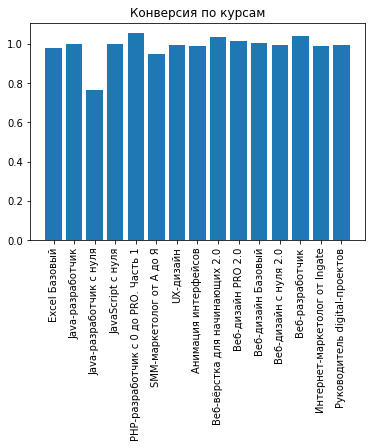

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

register_matplotlib_converters()
fig, subplot = plt.subplots()

# получаем данные по графику
# найду медианное значение конверсии по модулям по каждому курсу
df_title_conversion = df_convers.loc[:, ['title', 'conversion']].groupby(['title']).median()
conversion = df_title_conversion.loc[:, 'conversion'].values
x_axis = df_title_conversion.index.values

# график функции
subplot.bar(x = x_axis, height = conversion)

# подписываем график
subplot.set_title("Конверсия по курсам")

# подписи для оси Ох
x_labels = [str(i) for i in x_axis]

# добавляем подписи к осям
plt.xticks(x_axis, rotation='vertical', labels=x_labels)

plt.show()

3. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**Вывод** исходя из полученных данных можно сказать что в целом конверсия по курсам одинаковая, но в семье не без урода и тут у нас есть самый низкий , выбивающийся из всех курсов, показатель конверсии по курсу 'Java-разработчик c нуля'